# Identify successful video games

In our work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. Our goal is to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns in the future.

In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
import pandas as pd
import math
import seaborn as sns
import matplotlib.colors as colors
import plotly.graph_objects as go
import squarify
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Data information
df = pd.read_csv('games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
for i in df.columns:
    print(i, len(df[df[i]==0]))

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


There are columns with 0 in their values. We will treat it like a null value. 

In [5]:
df.shape

(16715, 11)

In [6]:
df.describe(include = ['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


The top value in the rating column is an object type . We will need to handle it.


In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We see the number of null values. In addition, the columns of sales are full, but we know from the previous checking there are values with zero.

In [9]:
#lowering the column names
df.columns = map(str.lower, df.columns)


In [10]:
#missing values 
print(df.isna().sum())
#name 
df = df.drop(df.index[[659, 14244]])

#user_score
#cleaning column from 'object' type 
#print(df[df['user_score']=='tbd'])

df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')
#print(df[df['user_score']=='tbd'])


#year of release
df['year_of_release'] = df['year_of_release'].dropna()

#rating
df['rating'] = df['rating'].fillna('RP')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


name: two names are missing. The rows contained 'NaN' values in several columns, so this rows was dropped.

Year_of_Release: 2% of this column is missing - the rows was dropped

Genre:  two gennre names are missing, are they the same like in the name column? - yes

User_Score: 40% of this column is missing. The 'tbd' value was replaced with 'NaN', because we don't know whether it will be rated again in the future or not. In addition we want to use thiis column for calculations so we will need a value which can perform mathematical operations.  

critic score - In a brief look it can be seen that values that are missing in critic score column will also be missing in the user score column. There are a lot of missing values and this can be due to a number of reasons: an old game or that just is not rated yet, maybe its popularity is low and therefore not rated. We will keep this null values and use the full data for our calculation .

When we will work with the critic score column  we will use only the data is full, even if its smaller.

rating: we fill the missing values with 'RP' = rating panding. Its a part of ESRB rating option for games which not have not been rated.



In [11]:
#duplecates
df.duplicated().sum()

0

There are no duplicated rows in our data . 

In [12]:
#sum of total sales for each game 

#new column with sum of each region
df['total_sale'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
#sum by name
sale_name = df.groupby('name')['total_sale'].sum().reset_index().sort_values(by='total_sale', ascending = False)
sale_name

,name,total_sale
11072,Wii Sports,82.54
3742,Grand Theft Auto V,56.58
9386,Super Mario Bros.,45.31
9775,Tetris,35.84
5611,Mario Kart Wii,35.52
...,...,...
8838,Smart Kid's Mega Game Mix,0.01
5051,Koi Sentai Love & Peace the P.S.P: Power Zenka...,0.01
8847,Smiley World: Island Challenge,0.01
3450,GTI Club: Supermini Festa!,0.01


1980.0
2016.0


<AxesSubplot:xlabel='year_of_release'>

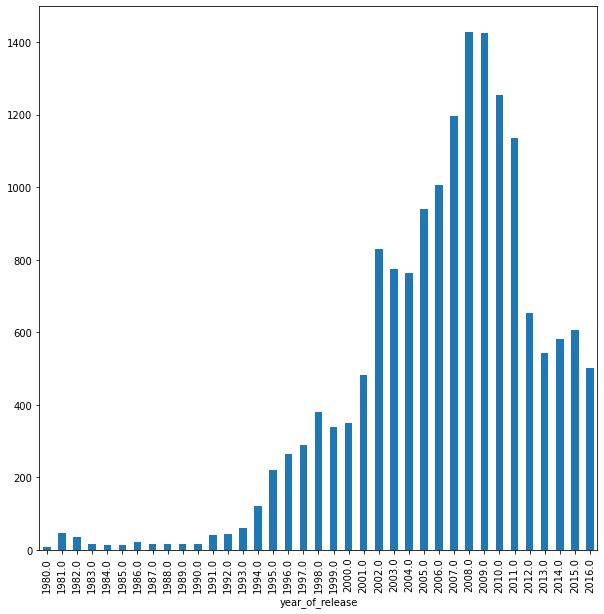

In [13]:
#games in each year

#the first and least year of release
print(df['year_of_release'].min())
print(df['year_of_release'].max())
#how many games released in different year
(
    df.groupby('year_of_release')['name']
    .count()
    .plot(x='year_of_release', y='name', kind='bar', figsize=(10,10))
)

There is an increase in games that released over the years. We can see the peak between the years 2007-2010.

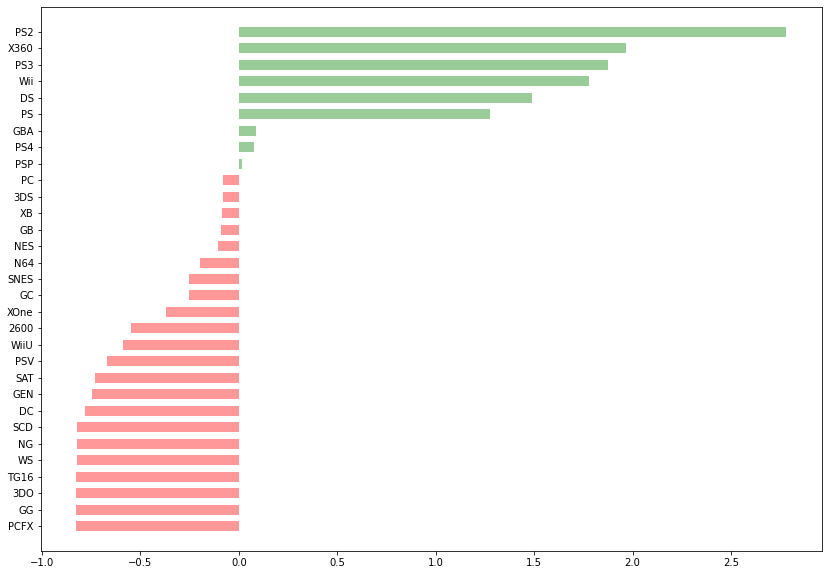

In [14]:
#popularity of platform with z-score
sales_plat = df.groupby('platform')['total_sale'].sum().reset_index().sort_values('total_sale')


#z-score calculation
sales_plat['sales_z'] = (sales_plat['total_sale'] - sales_plat['total_sale'].mean()) / sales_plat['total_sale'].std()
sales_plat['sales_z']

#new column
#distinguish z score by colors. 
#red for negative numbers. green for positive numbers 
sales_plat['colors'] = ['red' if x<0 else 'green' for x in sales_plat['sales_z']]
sales_plat['colors']

plt.figure(figsize=(14,10))
plt.hlines(y=sales_plat.platform, xmin=0, xmax=sales_plat.sales_z, colors=sales_plat.colors, alpha=0.4, linewidth=10)

By using the value Z, we calculate whether any value we have is positive or negative from the mean. This way we see which platform is successful and which is less.



In [15]:
#top sales by platform
sales_plat = df.groupby('platform')['total_sale'].sum().reset_index().sort_values('total_sale', ascending=False)
sales_plat_6 = sales_plat.head(6)
sales_plat_6


,platform,total_sale
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86


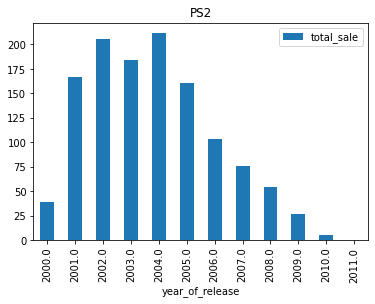

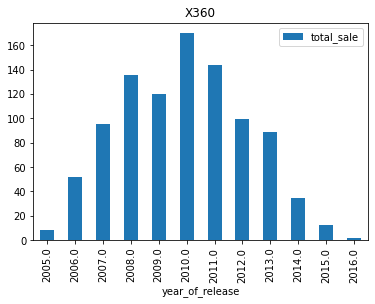

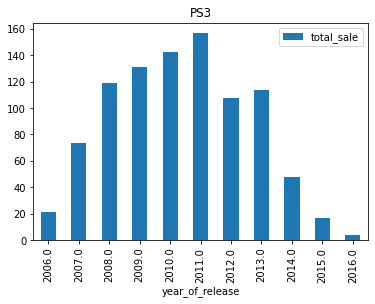

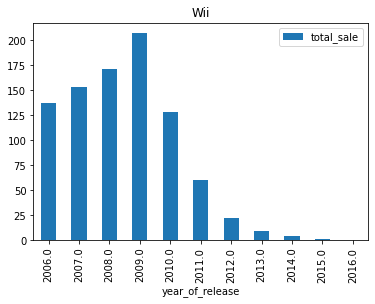

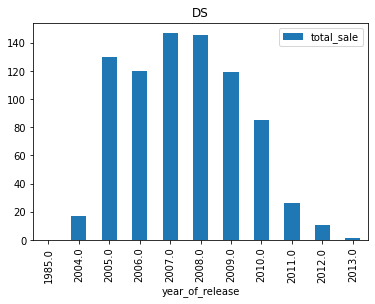

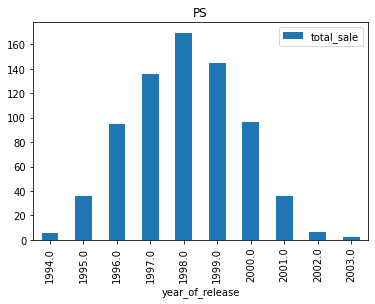

In [16]:
#total sales over the years of top 6 platforms 
# PS2 platform
ps2 = (
    df[df['platform']=='PS2']
    .groupby('year_of_release').sum().reset_index()
    .plot(x='year_of_release', y='total_sale', kind='bar', title='PS2')
)
#X360 platform 
x360 = (
    df[df['platform']=='X360']
    .groupby('year_of_release').sum().reset_index()
    .plot(x='year_of_release', y='total_sale', kind='bar', title='X360')
)
#PS3 platform
ps3 = (
    df[df['platform']=='PS3']
    .groupby('year_of_release').sum().reset_index()
    .plot(x='year_of_release', y='total_sale', kind='bar', title='PS3')
)

#Wii platform
wii = (
    df[df['platform']=='Wii']
    .groupby('year_of_release').sum().reset_index()
    .plot(x='year_of_release', y='total_sale', kind='bar', title='Wii')
)
#DS
ds = (
    df[df['platform']=='DS']
    .groupby('year_of_release').sum().reset_index()
    .plot(x='year_of_release', y='total_sale', kind='bar', title='DS')
)
#PS
ps = (
    df[df['platform']=='PS']
    .groupby('year_of_release').sum().reset_index()
    .plot(x='year_of_release', y='total_sale', kind='bar', title='PS')
)

We found the platforms with the highest sales. Next, we compared the graph of each platform sales by year. We can see there are platforms that were popular, but ufter a number of years the popularity decreased. It took 7 years for popularity to fade.


In [17]:
#top platforms of resent years
top = df.groupby(['platform', 'year_of_release']).sum().reset_index().sort_values(by='total_sale',  ascending=False)
top[top['year_of_release']>2006].head(15)

#the period of time we will work with 
real_df = df[df['year_of_release'] > 2006]

I decided to take data from the last ten years because on the one hand I want to use relevant information but on the other hand I want to put in the popular platforms. We see that once a new version came out for a particular platform it became less relevant. But we can conclude that if a particular platform was popular then the next one will be so even if there is not avidance yet in the chart. All that because as we have seen, a platform is changing its popularity for seven years.

<div class="alert alert-success" role="alert">
Looks reasonable</div>

In [18]:
real_df = real_df[real_df['total_sale']>0]

<AxesSubplot:>

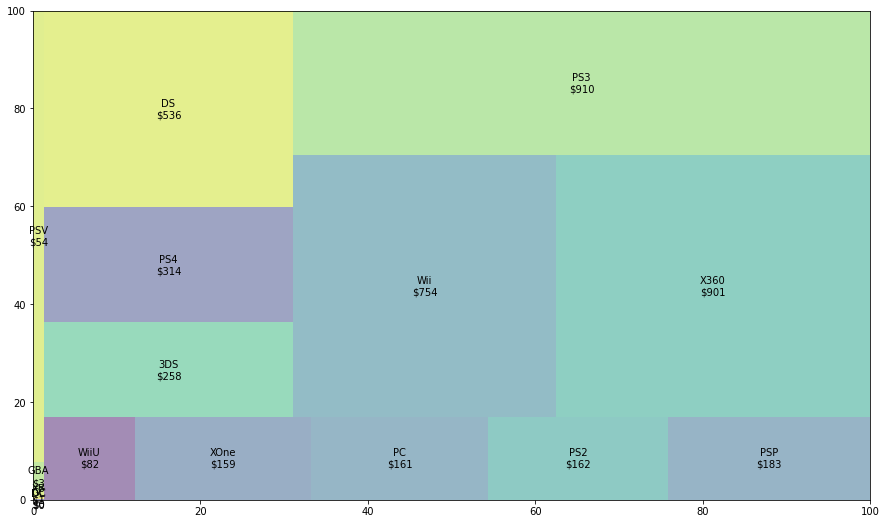

In [19]:
#top platforms
df_tree = real_df[['platform', 'total_sale']].groupby('platform').sum().sort_values(by='total_sale').reset_index()
df_tree = df_tree[df_tree['total_sale']!=0]

sizes= df_tree.total_sale.values.tolist()
lables = df_tree.apply(lambda x:str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)

plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label=lables, alpha=.5)

<AxesSubplot:xlabel='platform', ylabel='total_sale'>

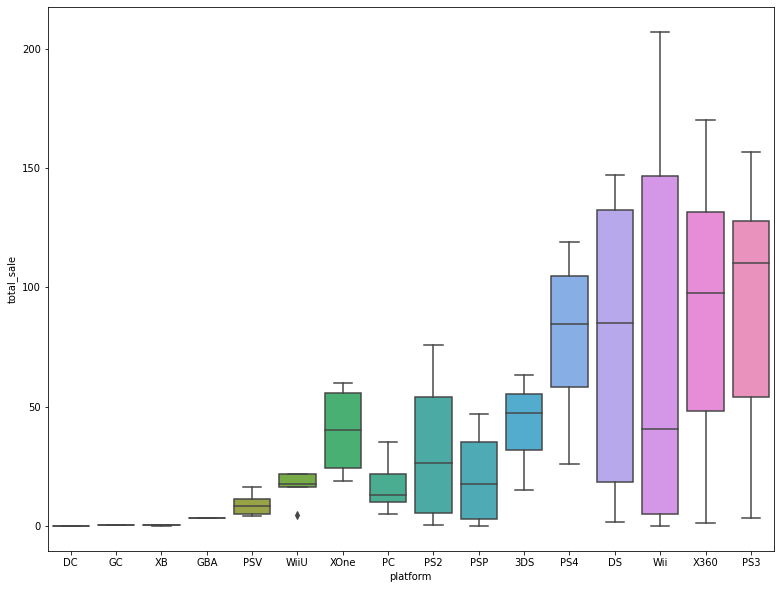

In [20]:
#Build a box plot for the global sales of all games, broken down by platform. 
#Are the differences in sales significant? What about average sales on various platforms? Describe your findings.


group_plat = real_df.groupby(['platform', 'year_of_release'])['total_sale'].sum().reset_index()
order_plat = group_plat.groupby('platform')['total_sale'].sum().sort_values().reset_index()['platform']

plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sale', data=group_plat, order=order_plat)

Within the boxplot we see the distribution sales of games by platform.
There are five platforms with a big advantage over the rest.
Once we have changed the range of years, we get a different picture. There are platforms like the X360 that were not apeared erlier

In [21]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose). 
#Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.


#using the data without NuN values

scores = real_df.query('critic_score!="NaN" & user_score!="NaN"')

#the influence of user scoreand critic score on sales Wii platform
scores_wii = scores[scores['platform']=="Wii"]



<AxesSubplot:xlabel='user_score', ylabel='total_sale'>

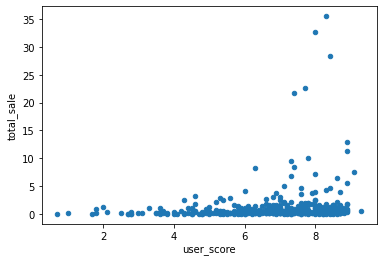

In [22]:
#plot scatter user score impact on total sale platform Wii

scores_wii.plot(x='user_score', y='total_sale', kind='scatter')



<AxesSubplot:xlabel='critic_score', ylabel='total_sale'>

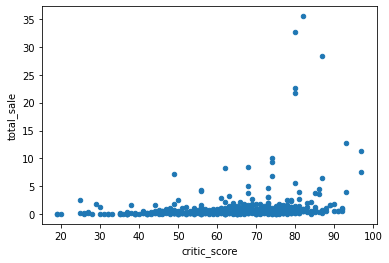

In [23]:
#plot scatter critic score impact on total sale platform wii
scores_wii.plot(x='critic_score', y='total_sale', kind='scatter')


In Japan the preferences are slightly different. But we see that everywhere PS3 and Wii are popular. Wii with a low average but skewing to the right and therefore stays popular.


In [24]:
#corolation between critic score and sales
scores_wii['total_sale'].corr(scores_wii['user_score'])

0.13820893048211888

In [25]:
#corolation between user score and sales
scores_wii['total_sale'].corr(scores_wii['critic_score'])

0.229591495201877

In both values tested: user score and critic score the correlation with the value total sale was examined. There is a correlation between those values and the total sales.

In [26]:
#compering other platforms: X360, PS3

#X360 correlation
scores_x360 = scores[scores['platform']=="X360"]
print(scores_x360['total_sale'].corr(scores_x360['user_score']))
print(scores_x360['total_sale'].corr(scores_x360['critic_score']))

#PS3 correlation
scores_ps3 = scores[scores['platform']=="PS3"]
print(scores_ps3['total_sale'].corr(scores_ps3['user_score']))
print(scores_ps3['total_sale'].corr(scores_ps3['critic_score']))

0.10969763634443415
0.3926816274729147
0.14154093147174016
0.42844725913442244


Correlations of other platforms are presented. It seems that compering this values of critic score with wii platform, this platforms have a stronger connection.

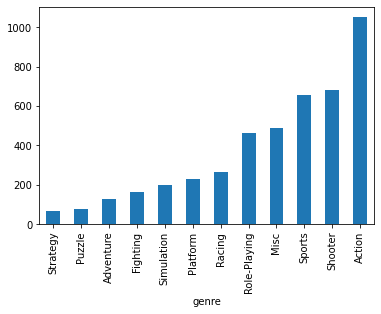

In [27]:
#Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 
#Can you generalize about genres with high and low sales?

genre_sale = real_df[real_df['genre']!="NaN"].groupby('genre')['total_sale'].sum().sort_values().plot(kind='bar')

The most profitable genre is action and the last profitable is strategy. The revenue from strategy is 69 million dollar compered to action genre that is 1050 million dollar.

We will check next what's happening with each region separatly.

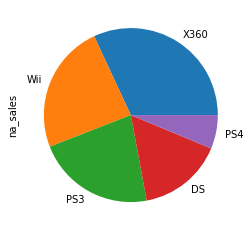

In [28]:
#step 4

#sales of each platform by region
na = (
    real_df.query('na_sales>0').groupby(['platform'])['na_sales']
    .sum().sort_values(ascending=False)[0:5]
        .plot(x='platform', y='na_sales', kind='pie')
)


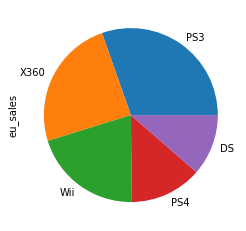

In [29]:
eu = (
    real_df.query('eu_sales>0').groupby(['platform'])['eu_sales']
    .sum().sort_values(ascending=False)[0:5]
        .plot(x='platform', y='eu_sales', kind='pie')
)

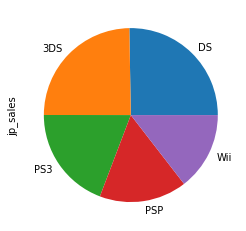

In [30]:
jp = (
    real_df.query('jp_sales>0').groupby(['platform'])['jp_sales']
    .sum().sort_values(ascending=False)[0:5]
        .plot(x='platform', y='jp_sales', kind='pie')
)



In the three pie graphs we see the total sales for each platform. In terms of platforms it seems that roughly the popularity between the regions is similar.

In [31]:
top_5 = real_df.groupby('platform')['total_sale'].sum().sort_values(ascending=False).reset_index()
top_5

,platform,total_sale
0,PS3,910.38
1,X360,901.37
2,Wii,754.03
3,DS,535.54
4,PS4,314.14
5,3DS,257.81
6,PSP,183.31
7,PS2,162.38
8,PC,160.57
9,XOne,159.32


In [32]:
#For each region (NA, EU, JP), determine the top five genres

<AxesSubplot:title={'center':'eu share'}, ylabel='share'>

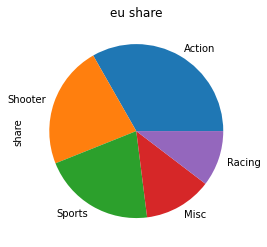

In [33]:
#total sales by region
#eu
eu_share = real_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[0:5].reset_index()
eu_rev = eu_share['eu_sales'].sum()
eu_share['share'] = (eu_share['eu_sales'] / eu_rev)*100

eu_share.set_index('genre')['share'].plot(kind='pie', title='eu share')

<AxesSubplot:title={'center':'na share'}, ylabel='share'>

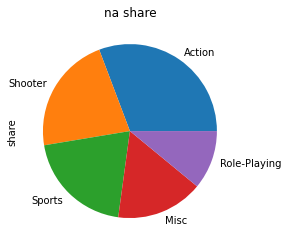

In [34]:
#na
na_share = real_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[0:5].reset_index()
na_rev = na_share['na_sales'].sum()
na_share['share'] = (na_share['na_sales'] / na_rev)*100

na_share.set_index('genre')['share'].plot(kind='pie', title='na share')

<AxesSubplot:title={'center':'jp share'}, ylabel='share'>

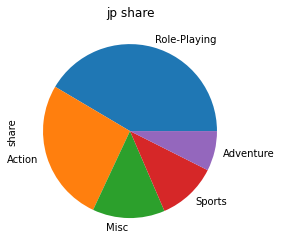

In [35]:
#jp
jp_share = real_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[0:5].reset_index()
jp_rev = jp_share['jp_sales'].sum()
jp_share['share'] = (jp_share['jp_sales'] / jp_rev)*100

jp_share.set_index('genre')['share'].plot(kind='pie', title='jp share')

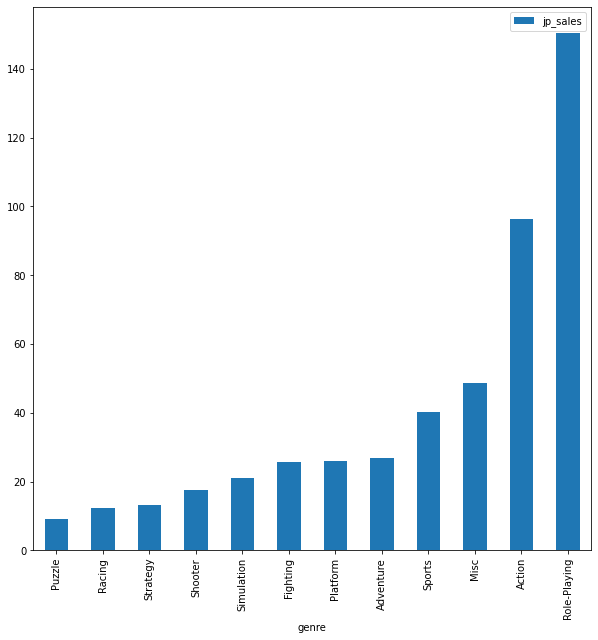

In [36]:
jp_genre = (
    real_df.query('jp_sales>0').groupby(['genre'])['jp_sales']
    .sum().sort_values().reset_index()
        .plot(x='genre', y='jp_sales', kind='bar', figsize=(10,10))
)


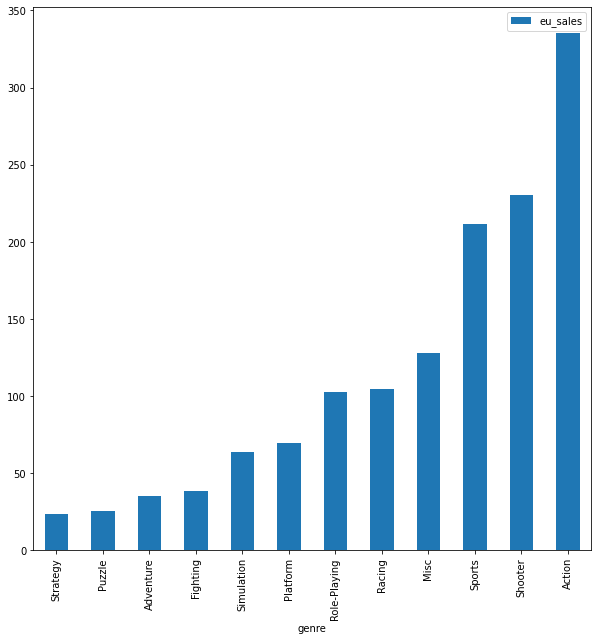

In [37]:
eu_genre = (
    real_df.query('eu_sales>0').groupby(['genre'])['eu_sales']
    .sum().sort_values().reset_index()
        .plot(x='genre', y='eu_sales', kind='bar', figsize=(10,10))
)

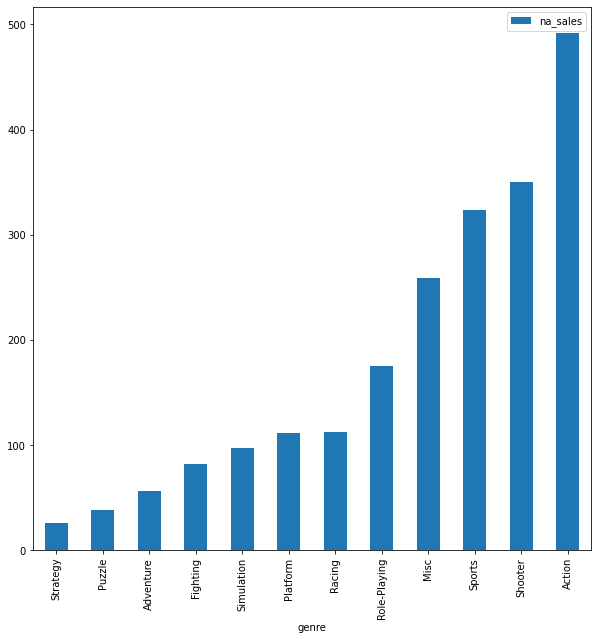

In [38]:
na_genre = (
    real_df.query('na_sales>0').groupby(['genre'])['na_sales']
    .sum().sort_values().reset_index()
        .plot(x='genre', y='na_sales', kind='bar', figsize=(10,10))
)


We calculated the ratio of sales to genre from total sales to the same area. We see three pie graphs that represent the relationship between genre and total sales. The ACTION genre seems to be popular in the three regions. In addition, in Japan, most sales are in games from the role playing genre.

In [39]:
#Do ESRB ratings affect sales in individual regions

<AxesSubplot:title={'center':'na sales by rating'}, ylabel='share'>

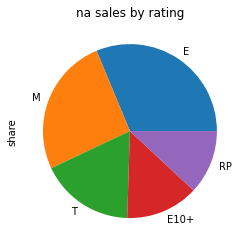

In [40]:
#na
na_rating = real_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)[0:5].reset_index()
na_rev_r = na_rating['na_sales'].sum()
na_rating['share'] = (na_rating['na_sales'] / na_rev_r)*100

na_rating.set_index('rating')['share'].plot(kind='pie', title='na sales by rating')

<AxesSubplot:title={'center':'jp sales by rating'}, ylabel='share'>

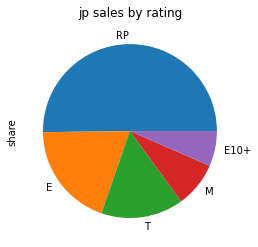

In [41]:
#jp
jp_rating = real_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)[0:5].reset_index()
jp_rev_r = jp_rating['jp_sales'].sum()
jp_rating['share'] = (jp_rating['jp_sales'] / jp_rev_r)*100

jp_rating.set_index('rating')['share'].plot(kind='pie', title='jp sales by rating')

<AxesSubplot:title={'center':'eu sales by rating'}, ylabel='share'>

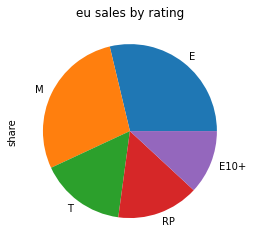

In [42]:
#eu
eu_rating = real_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)[0:5].reset_index()
eu_rev_r = eu_rating['eu_sales'].sum()
eu_rating['share'] = (eu_rating['eu_sales'] / eu_rev_r)*100

eu_rating.set_index('rating')['share'].plot(kind='pie', title='eu sales by rating')

The following graphs show the relationship between the ESRB's ratings and the amount of sales by region. It seems that in Japan most of the sales are from games that have not been rated at all. In North America and Europe the popular games are the games that are for everyone.



Question to reviewer: In the question of the platforms I made a pie chart for the total sales. The graphs of the tasks genres and ratings in which graphs were made of the ratio of total sales to that area. I did not exactly understand the difference between the two forms and what the result of each was.

In [43]:
#step 5

#Test the following hypotheses:
#Average user ratings of the Xbox One and PC platforms are the same.

#the hypotheses tested:
# H0= Xbox mean = PC mean 
# H1= Xbox mean != PC mean 

#two population tasted:
xone = real_df.query('platform == "XOne" & user_score != "NaN"')['user_score']
pc = real_df.query('platform == "PC" & user_score != "NaN"')['user_score']

#t-test : 
alpha1 = .05
results1 = st.ttest_ind(xone, pc)
print('p-value: ', results1.pvalue)
 
if results1.pvalue < alpha1:
    print('reject null hypothses')
else:
    print("can't reject null hupotheses")
    
     

p-value:  0.05554752084307562
can't reject null hupotheses


The t-test showing that we can't reject the null hyputhses. The two average values are equal 

In [44]:
#Test the following hypotheses:
#Average user ratings for the Action and Sports genres are different.

#the hypotheses tested:
# H0= action genre mean = sports genre mean 
# H1= action genre mean != sports genre mean 

#two population tasted:
action = real_df.query('genre == "Action" & user_score != "NaN"')['user_score']
sports = real_df.query('genre == "Sports" & user_score != "NaN"')['user_score']

#t-test : 
alpha2 = .05
results2 = st.ttest_ind(action, sports)
print('p-value: ', results2.pvalue)
 
if results2.pvalue < alpha2:
    print('reject null hypothses')
else:
    print("can't reject null hupotheses")
  

p-value:  1.0894514919563483e-12
reject null hypothses


Folowing the t-test results we claim the average of two population is different. 
The sugnificant level was chosen because it is the most acceplable for experiments.


In conclusion, after checking the parameters in the table it can be said that the leading platforms are PS3, Wii, X360. And therefore they will be the choice for the campaign theme. Because all platforms have decrease in sales over the years I would recommend checking additional parameters to decide which platform of three is best suited for advertising in 2017.